# Project Topic and Description:

This project is about ***Early Detection of Parkinson's disease***.
Parkinson’s disease is a degenerative neurological disorder in which the brain cells that normally produce the neurotransmitter dopamine die off. When these cells die, the brain loses its ability to control movement, which leads to tremors in the hands and feet. People with Parkinson’s disease may eventually lose their ability to walk and talk and can experience memory loss, behavioral differences, chronic pain, depression and fatigue.

Symptoms generally develop slowly over years.

10 early signs of Parkinson's Disease are:


1.   Tremor: This is the most common early sign
2.   Small Handwriting: Handwriting gets much smaller than it was in the past, this is called **Micrographia**
3.   Loss of smell: Your sense of smell gets impacted even when you don't have any cold or flu or stuffy nose
4.   Trouble Sleeping: Sudden movements during sleep
5.   Trouble moving or walking: You might feel stiffness in your body, arms or legs. People sometimes say, their feet seem stuck on the floor
6.   Constipation: Trouble moving your bowels without straining every day
7.   Soft or low voice: Change in voice could be a symptom
8.   Masked face: When we have a serious, depressed or mad look even when we are not in a bad mood
9.   Dizziness or fainting
10.  Stooping or Hunching over



# Type of Problem and Task:

This is going to be a **Supervised Machine Learning problem** as we have labeled data with range of biomedical voice measurements from different patients. Some of them have the Parkinson's disease and rest don't have. We will be using several algoritms to do the classification and the one with best results will be our final choice.
And it is basically a **Classification task** as based on certain parameters identified by our model we are going to classify a patient as having PD or not having PD.

# Goal:

The Parkinson’s Foundation estimates that around 930,000 Americans live with the disease.Parkinson’s disease tends to strike people age 60 and older; however, 5 to 10 percent of cases are “early onset.” The disease can be inherited, but the majority of cases are “spontaneous” with no apparent cause. Environmental factors, such as exposure to pesticides, have been linked to an increased risk of Parkinson’s disease.

Currently, there are no therapeutics to treat the root cause of the disease, but there are drugs to help relieve symptoms. Patients frequently receive a medication called **levodopa**, also called **L-dopa**, which nerve cells can use to boost the brain’s dopamine supply.

The only tool we have is to detect the onset of this disease as early as possible so that treatments could be more effective. With help of machine learning tools we can predict whether a particular patient has Parkinson's disease or not. This is crucial for health and medicine department of almost all nations worldwide.


# Data Source:

For this project we will be using **Oxford Parkinson's Disease Detection multivariate dataset**. The link to download is as follows:

https://archive.ics.uci.edu/dataset/174/parkinsons

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in CSV format.The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

The details of some of the columns are as follows:

* **name** - ASCII subject name and recording number
* **MDVP:Fo(Hz)** - Average vocal fundamental frequency
* **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency
* **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency
* **MDVP:Jitter(%)**,**MDVP:Jitter(Abs)**,**MDVP:RAP**,**MDVP:PPQ**,**Jitter:DDP** - Several measures of variation in fundamental frequency
* **MDVP:Shimmer**,**MDVP:Shimmer(dB)**,**Shimmer:APQ3**,**Shimmer:APQ5**,**MDVP:APQ**,**Shimmer:DDA** - Several measures of variation in amplitude
* **NHR**,**HNR** - Two measures of ratio of noise to tonal components in the voice
* **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
* **RPDE**,**D2** - Two nonlinear dynamical complexity measures
* **DFA** - Signal fractal scaling exponent
* **spread1**,**spread2**,**PPE** - Three nonlinear measures of fundamental frequency variation



# Importing the Dependencies

In [3]:
#Make necessary imports
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import iplot
import plotly as py
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import tensorflow as tf
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
#It will show all the rows of our dataset as it has only 195 rows and will also show all columns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 200)

In [6]:
#Even if the data is not in CSV we can use read_csv to load .data file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


'**status**' column is the target column for us. It has two values, 0(Healthy) and 1(has PD). As this is labeled data so we know if a patient is having Parkinson's disease or not.

In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

So here we can see that total number of rows is 195 and we have 24 columns.

**Getting Statistical Measures about Data:**

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


We can see count for each feature. We can see mean value for each feature as well. Also we can see min and max values for each of them. Standard deviations can also be seen here.

# Data Cleaning and EDA:

The first thing we do when we get any dataset is, data cleaning.
The goal of data cleaning is to ensure that the data is accurate, consistent, and free of errors, as incorrect or inconsistent data can negatively impact the performance of the ML model.When you clean your data, all outdated or incorrect information is gone – leaving you with the highest quality information.
Lets check if we have any null values or missing values in the dataset.

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Checking non-standard missing values:**

What if we have some non-standard values in our dataset. Pandas can recognize only NA as missing values if the text value is na then it won't catch that. So we will have to import our dataset little bit differently so that we can see any non-standard missing values as well, if any.

In [8]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--", "?","NaN"]
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/parkinsons.data", na_values = missing_values)
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

As we can see above there is no null values here. Now lets check the data type for each column/attribute.

In [9]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

As we can see above that '**name**' is object and rest everything else is number(integer or float). We don't need this name column so we can drop this later on.

In [10]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

# Visualization : Overall distribution of data

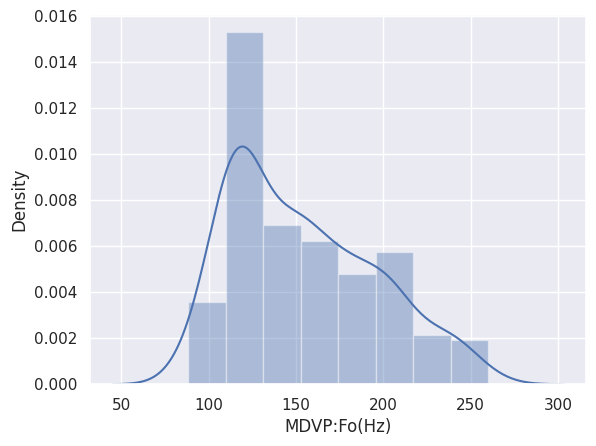

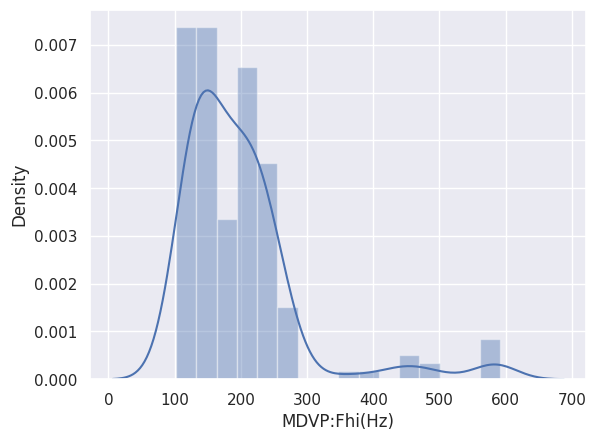

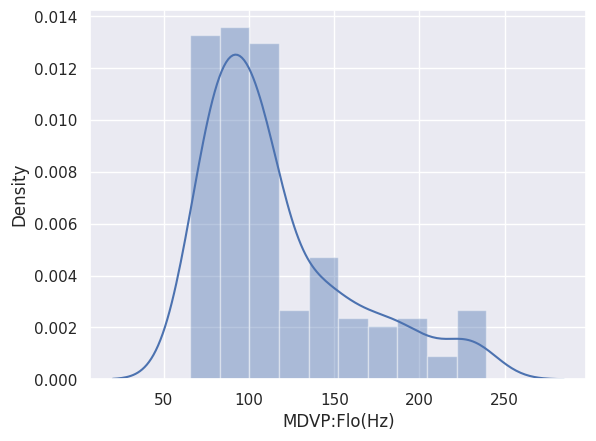

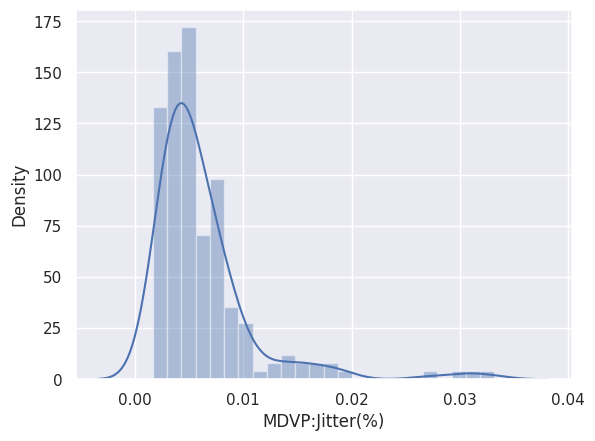

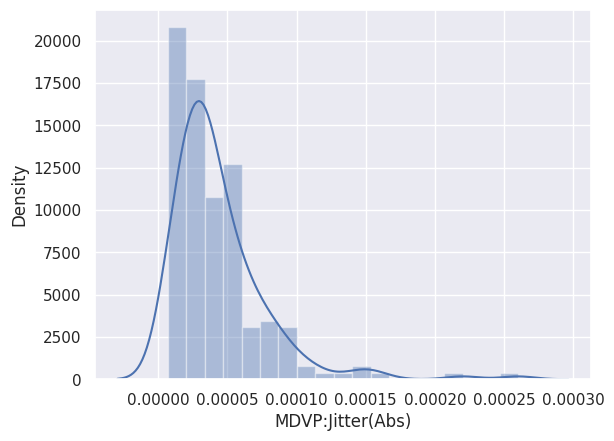

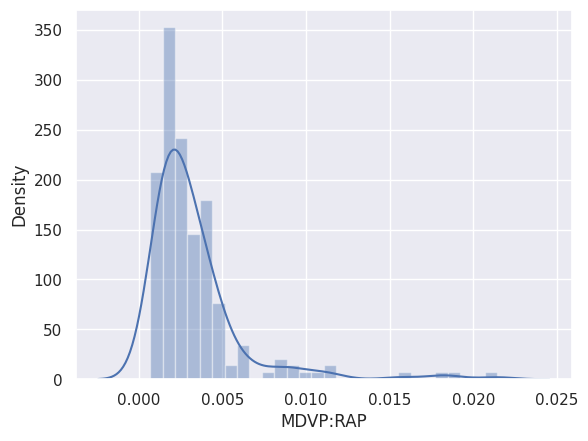

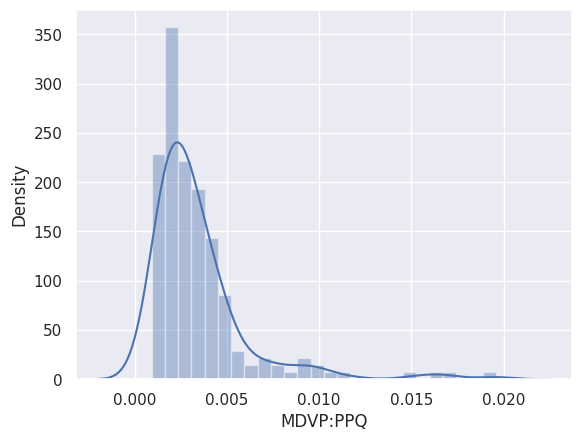

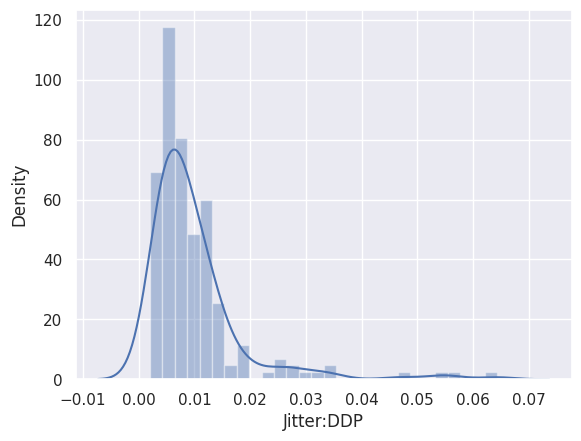

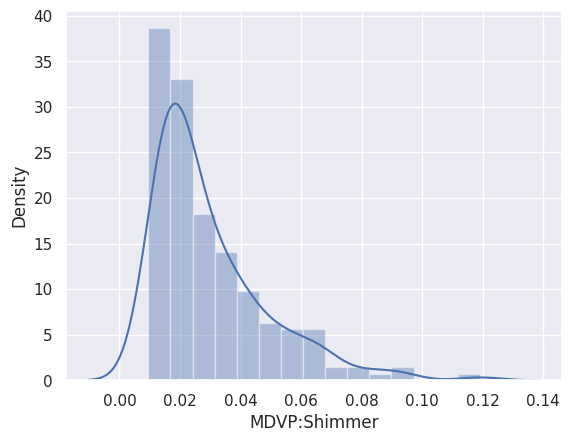

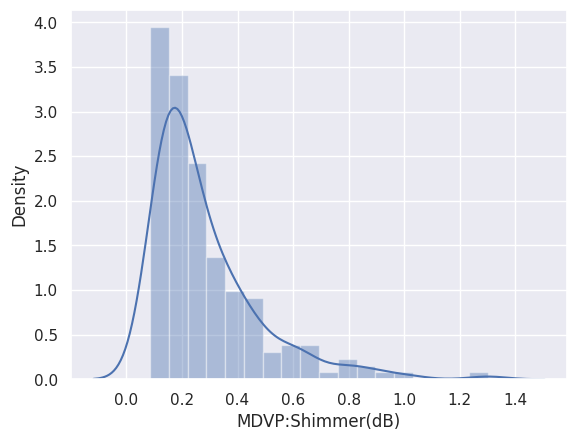

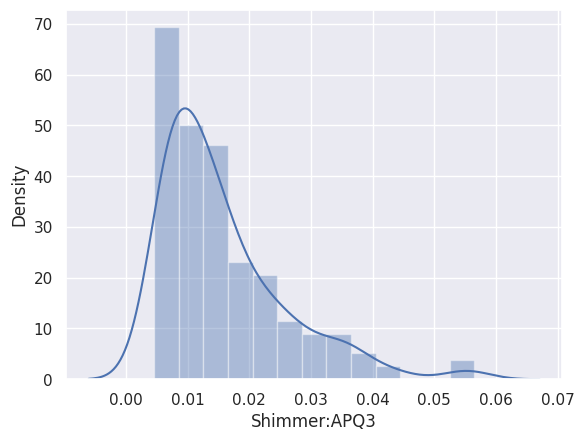

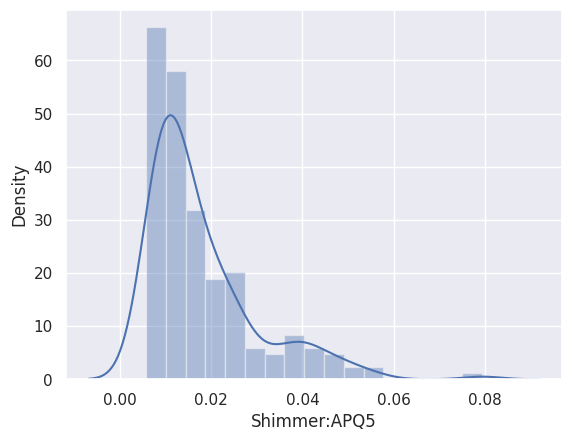

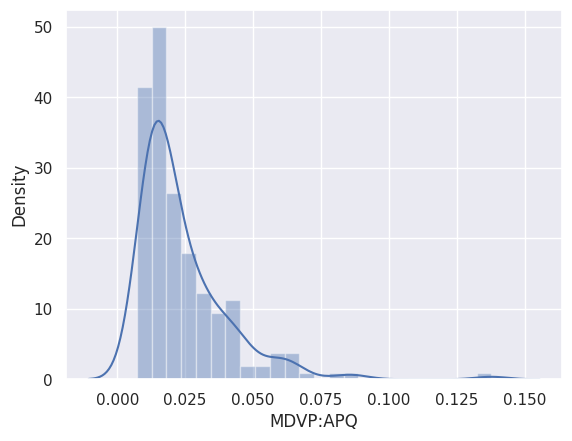

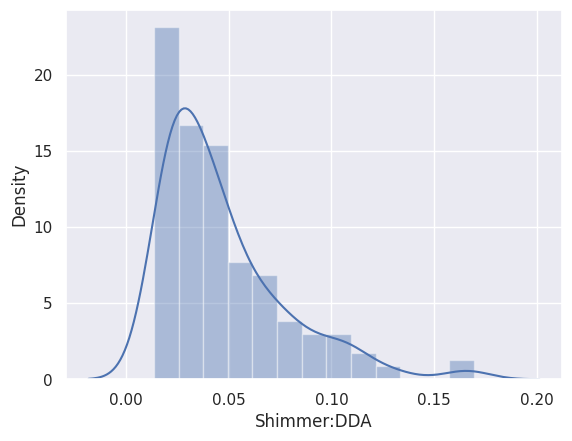

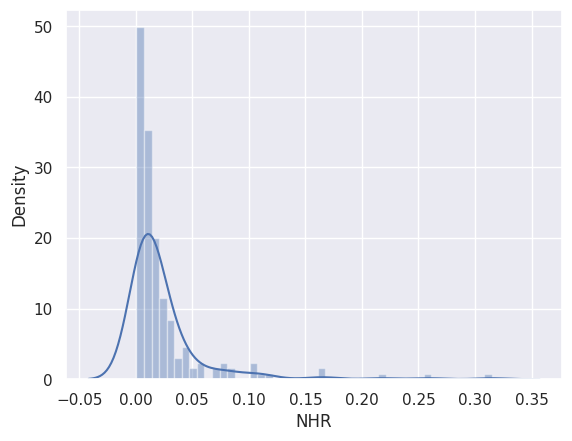

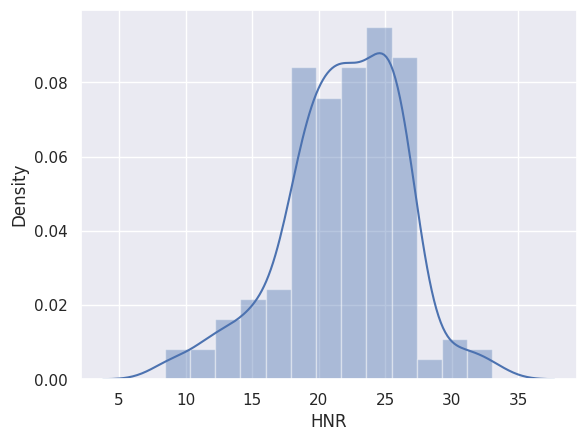

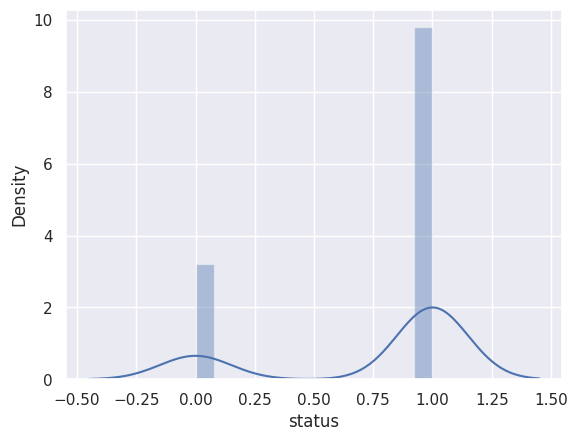

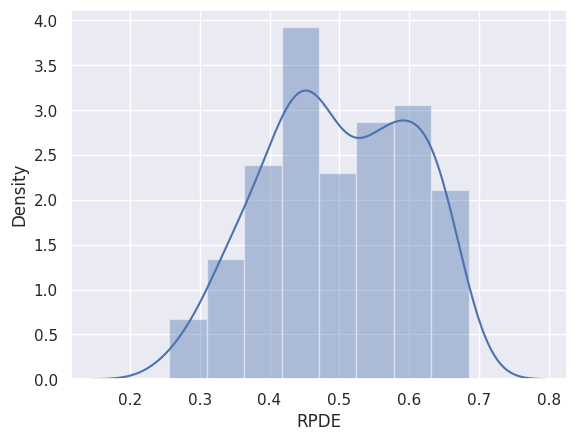

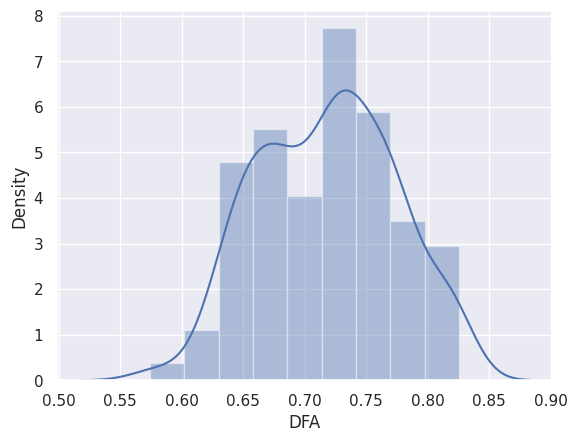

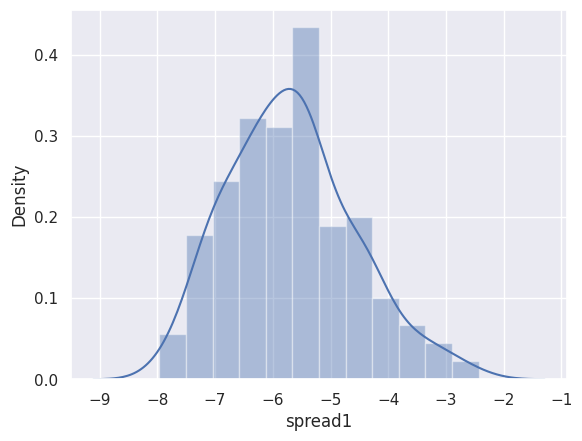

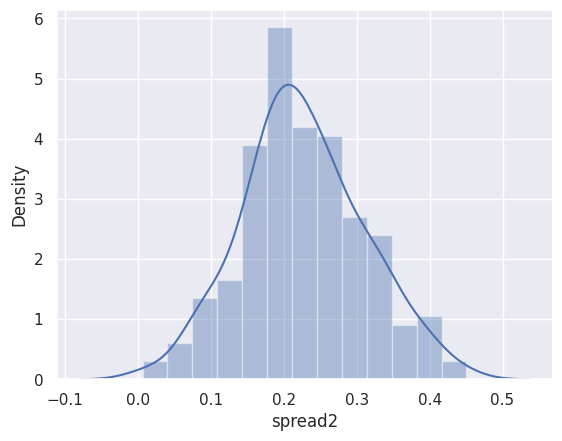

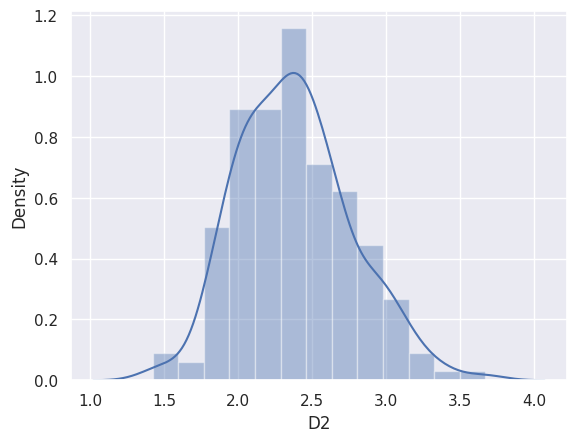

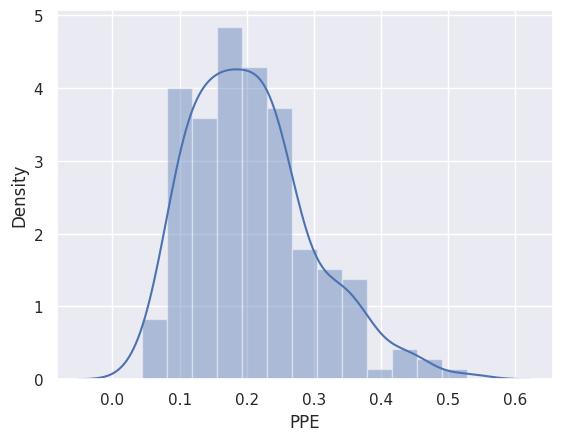

In [11]:
# find the distribution of data
def distplot(col):
  sns.distplot(df[col])
  plt.show()

for i in list(df.columns)[1:]:
  distplot(i)

So we see that the features have more or less a Gaussian distribution with some skewness. That could be outliers too, which we will inspect later on.

# Visualizations : Histograms

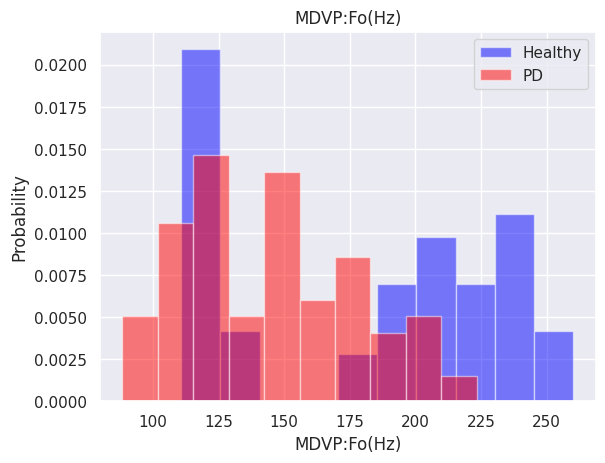

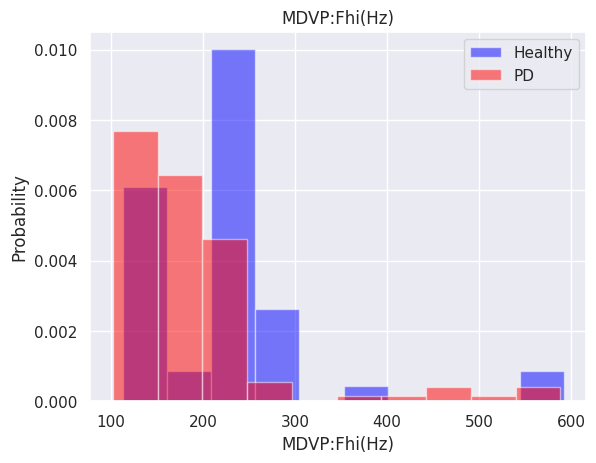

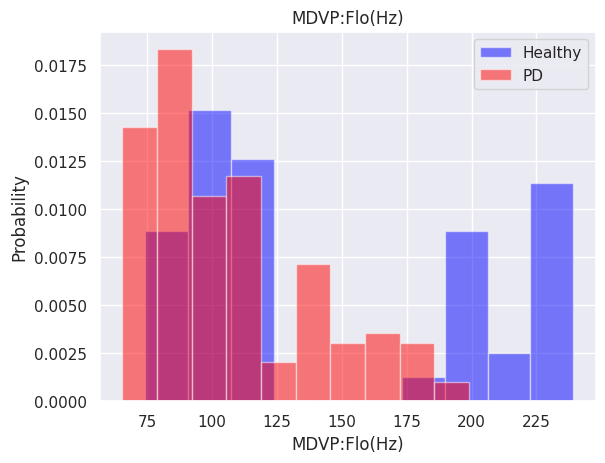

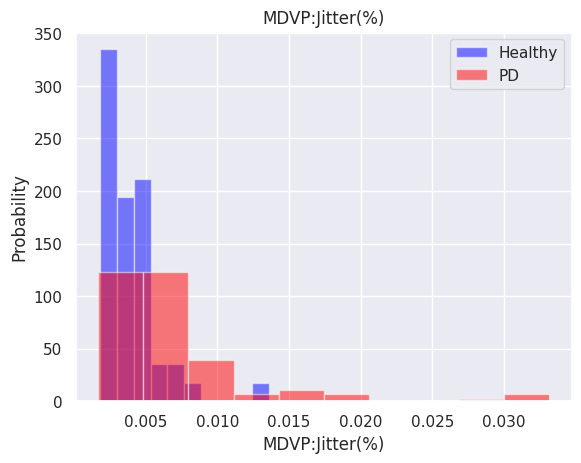

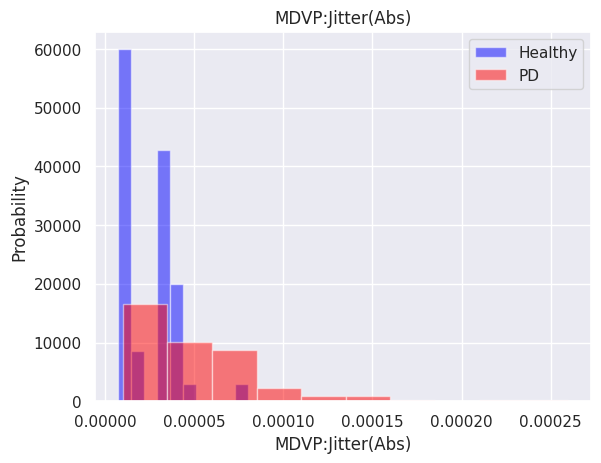

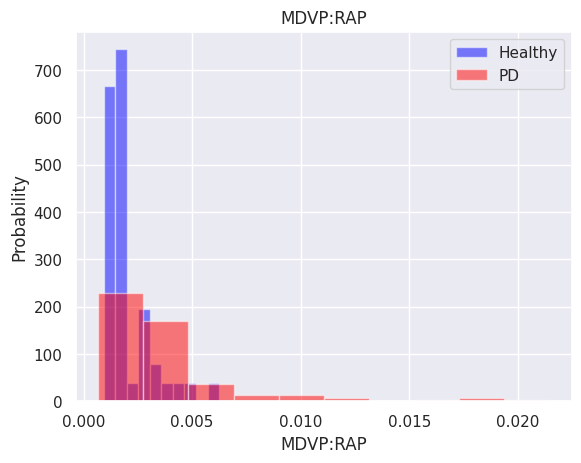

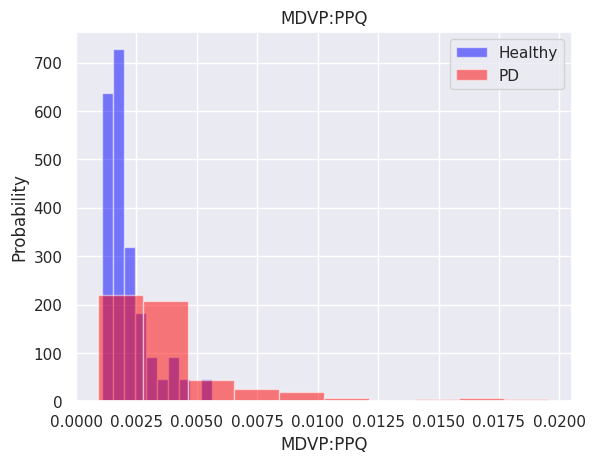

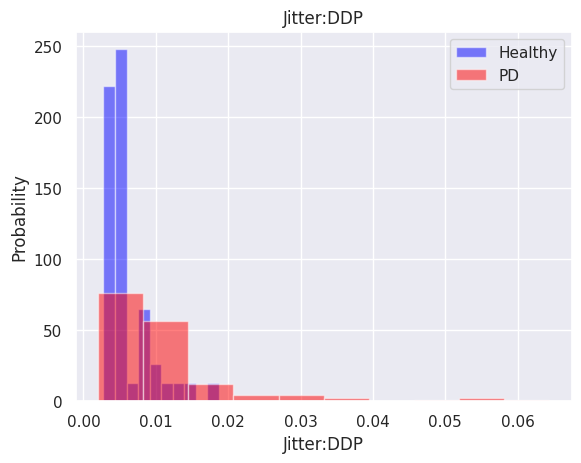

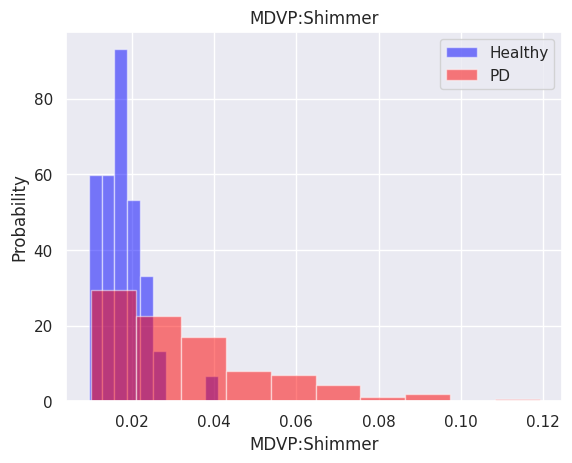

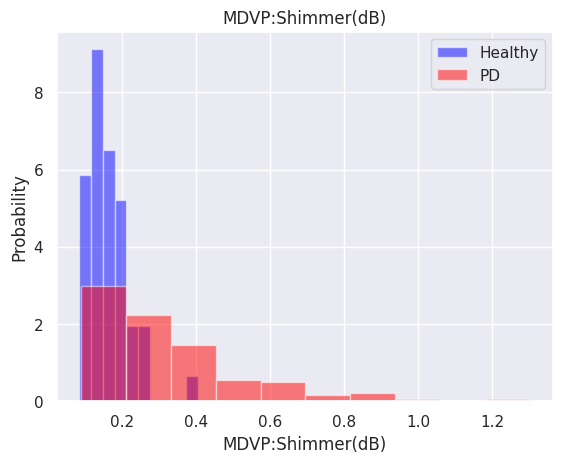

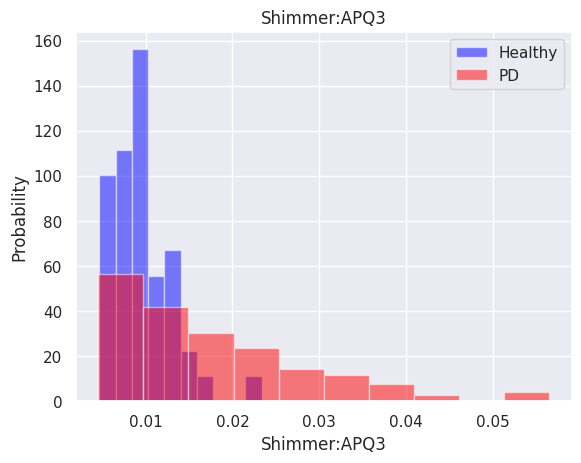

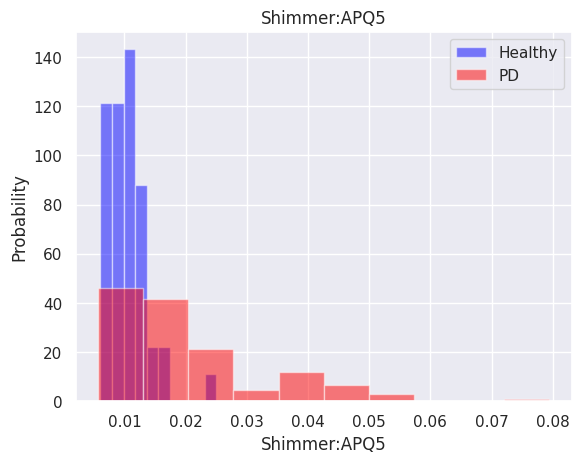

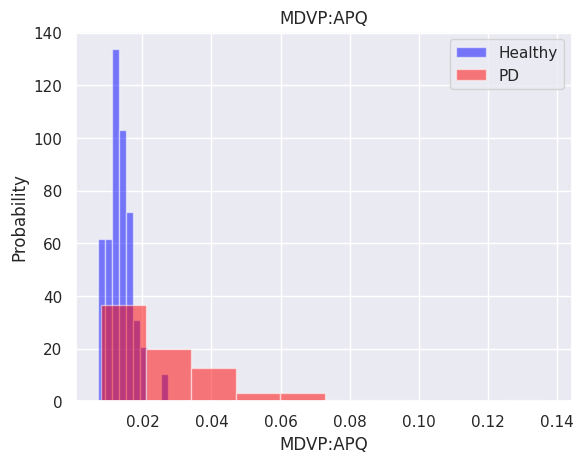

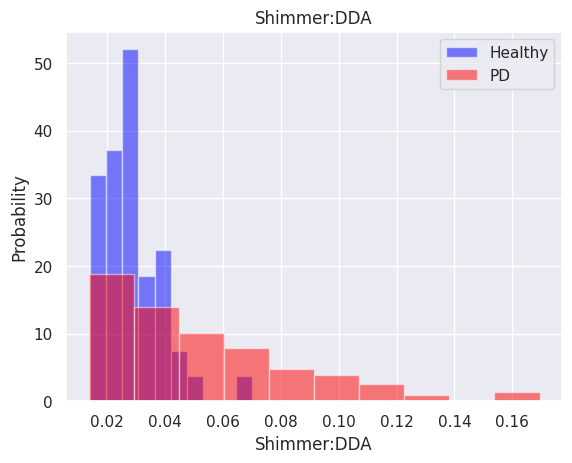

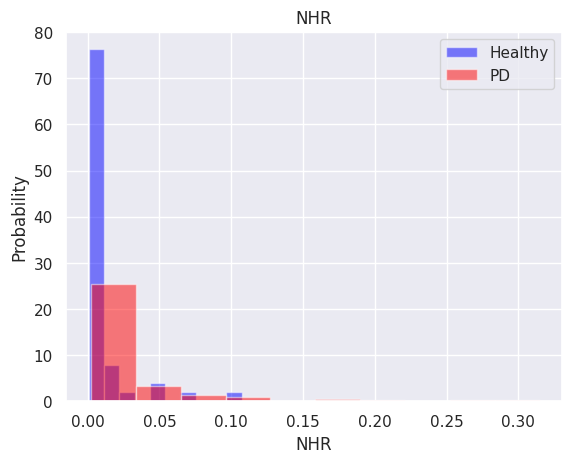

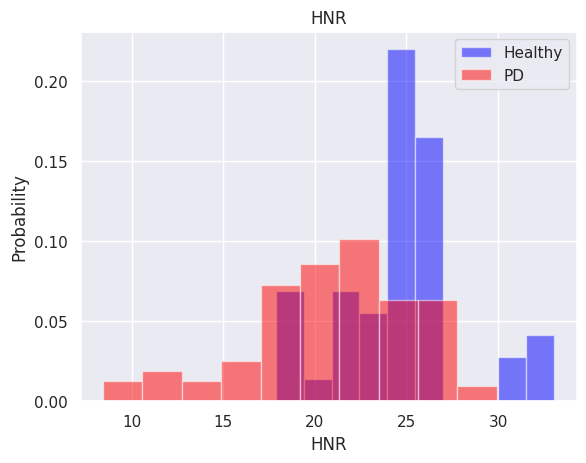

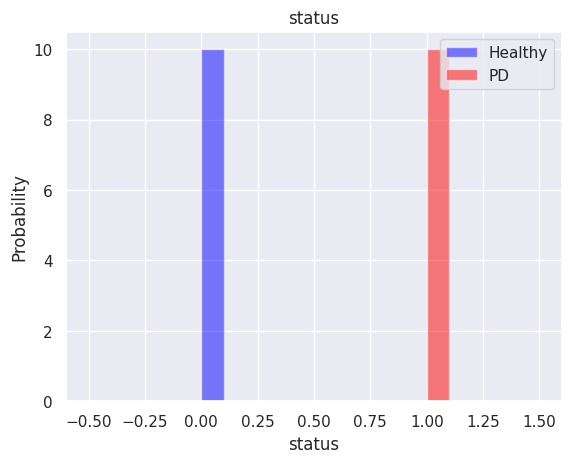

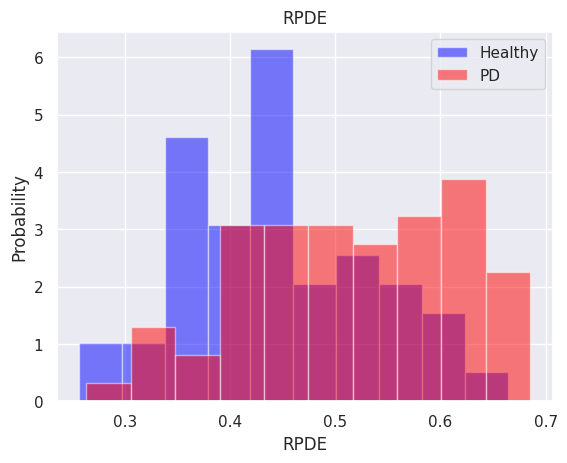

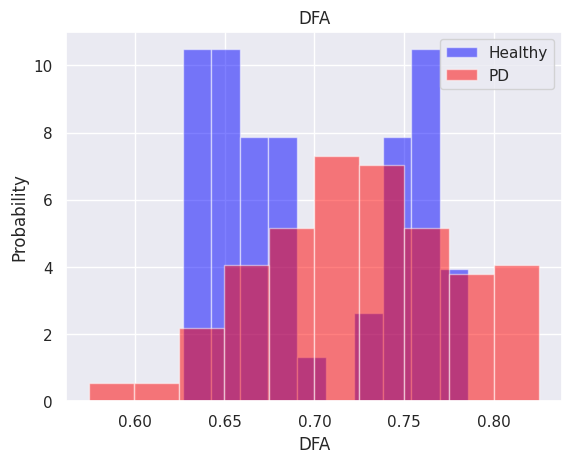

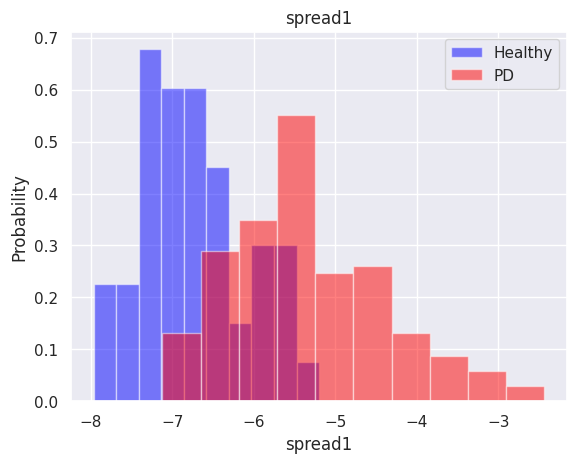

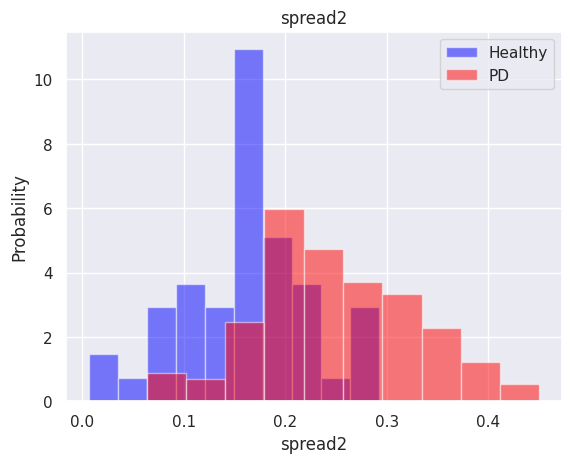

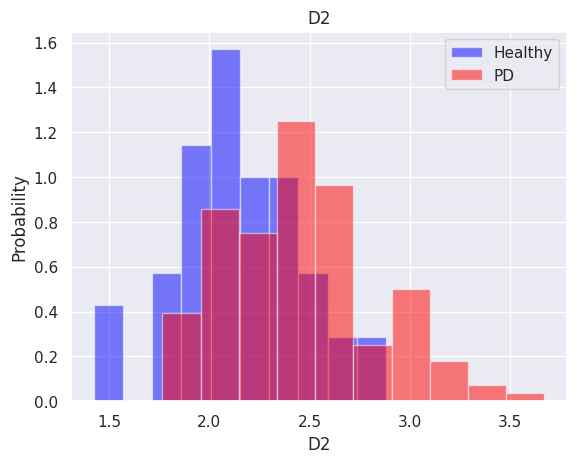

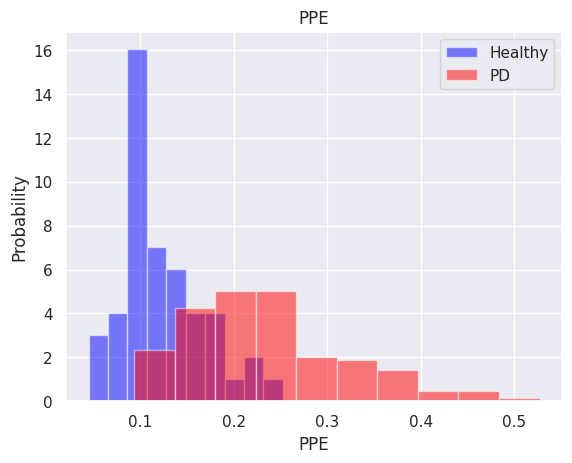

In [12]:
#Now we can draw histograms for each label/feature to better understand the distribution of status column as 0 and 1
for labels in df.columns[1:]:
  plt.hist(df[labels][df['status'] == 0], alpha=0.5, color='blue', label='Healthy', density=True)
  plt.hist(df[labels][df['status'] == 1], alpha=0.5, color='red',label='PD', density=True)
  plt.legend(loc='upper right')
  plt.title(labels)
  plt.xlabel(labels)
  plt.ylabel('Probability')
  plt.show()

These histograms give us an idea of every feature distribution for two segments, healthy and parkinson's patients. So for example if we look at the histogram of PPE then PD patients have wider range than the healthy people.

# Visualization : Box Plots

We can draw box plots to see if we have any outliers. An outlier is a datapoint in a dataset that is distant from all other observations. A datapoint that lies outside the overall distribution of the dataset.

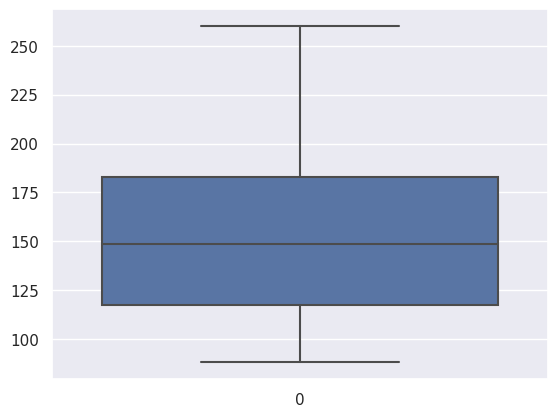

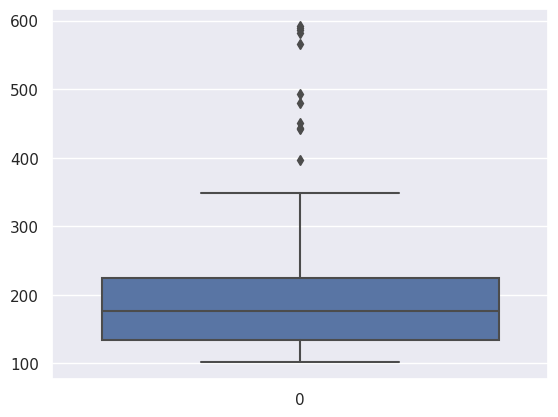

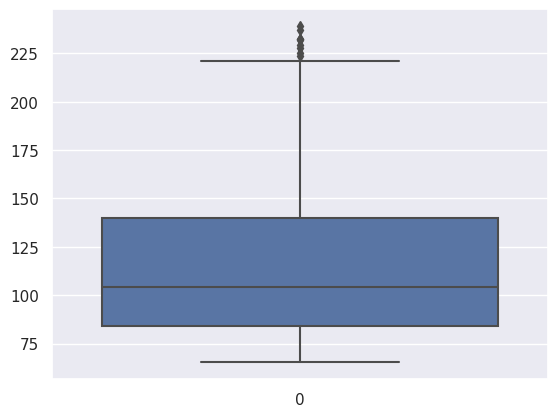

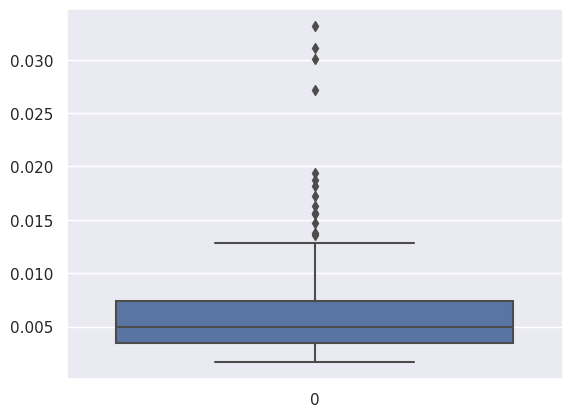

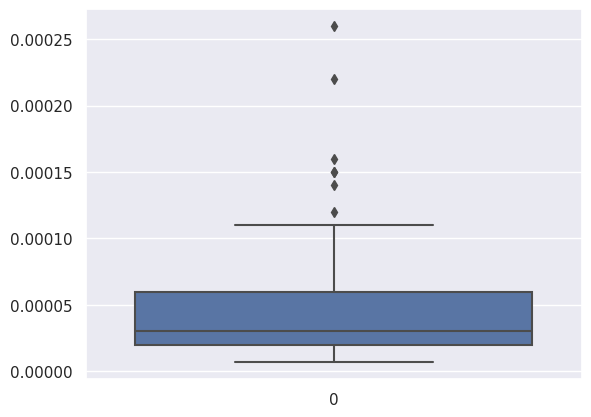

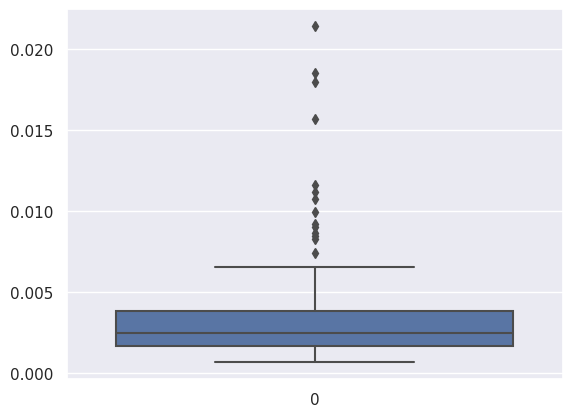

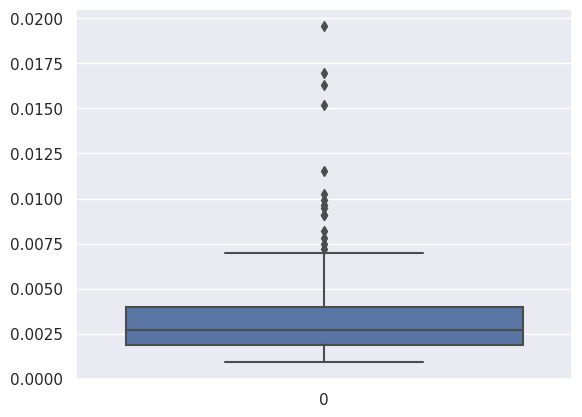

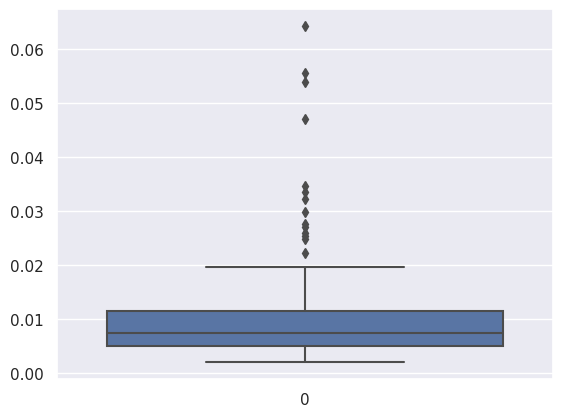

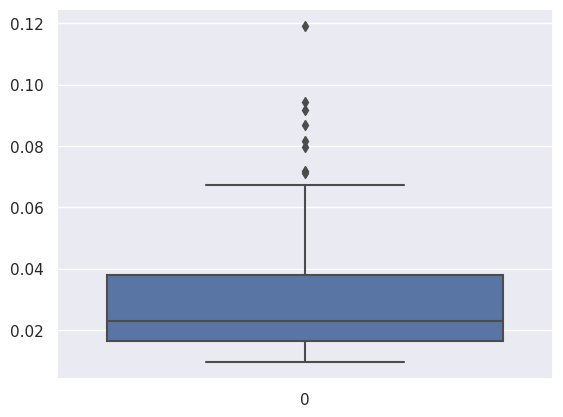

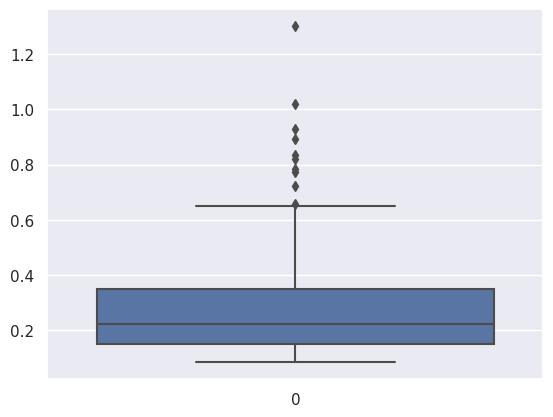

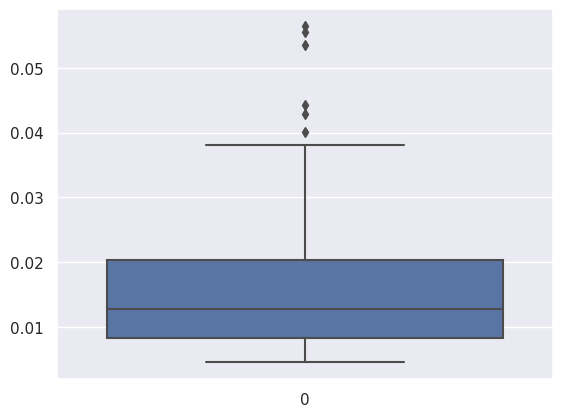

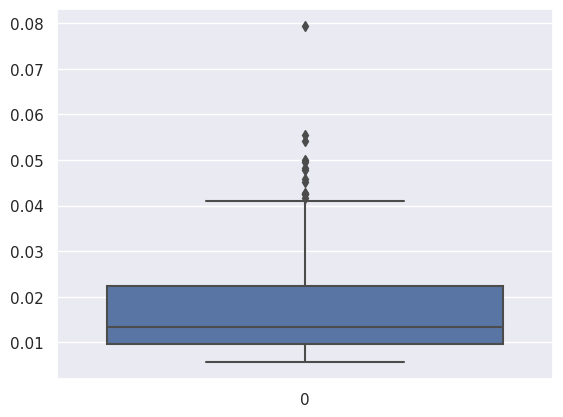

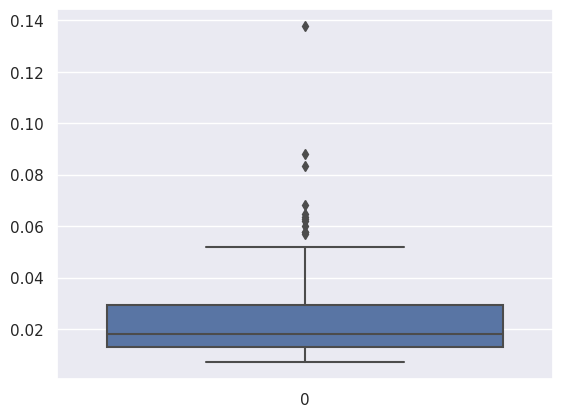

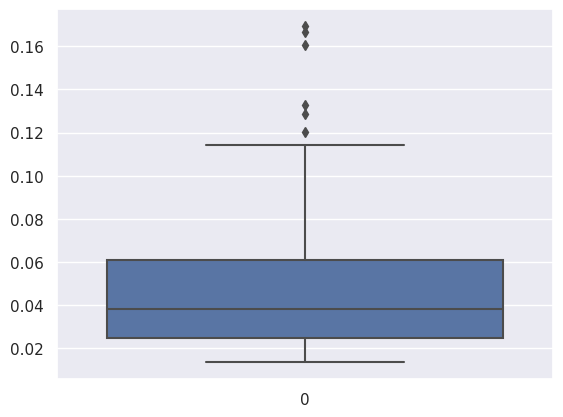

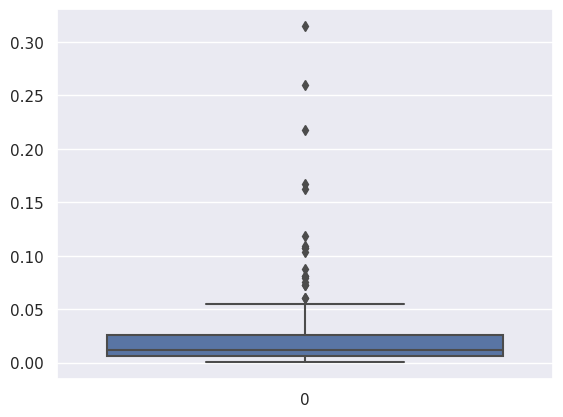

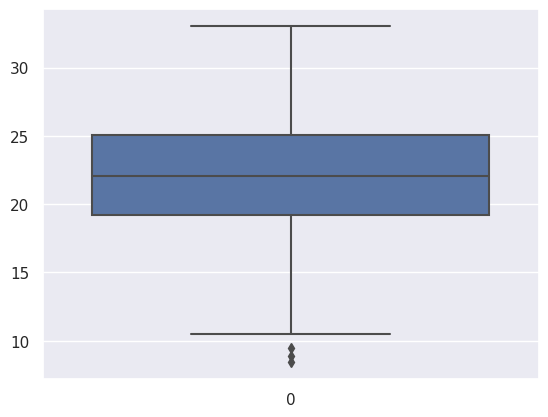

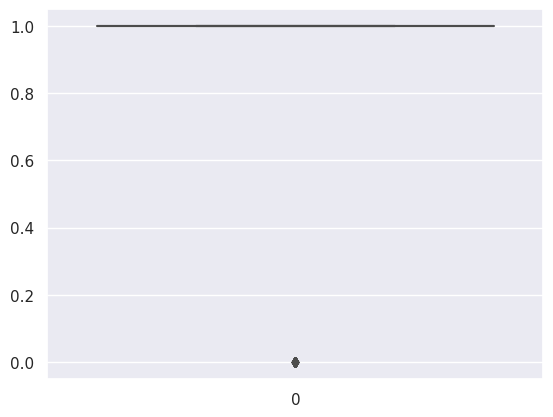

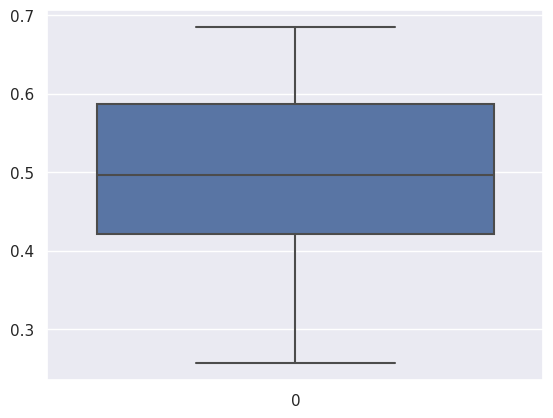

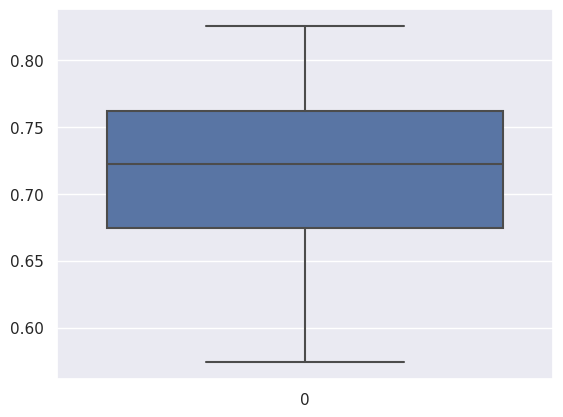

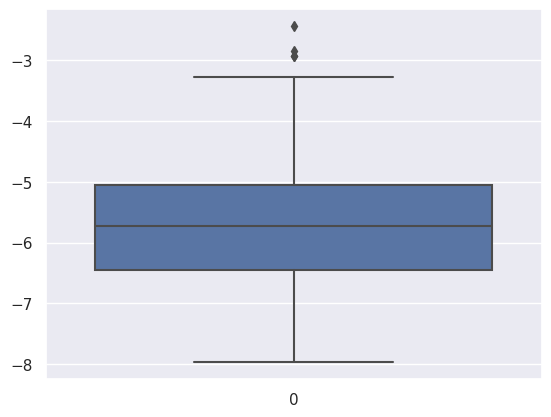

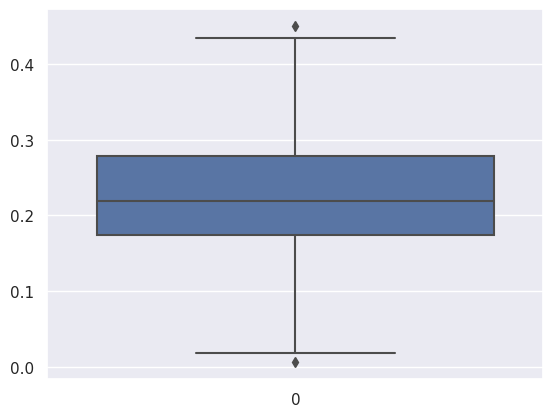

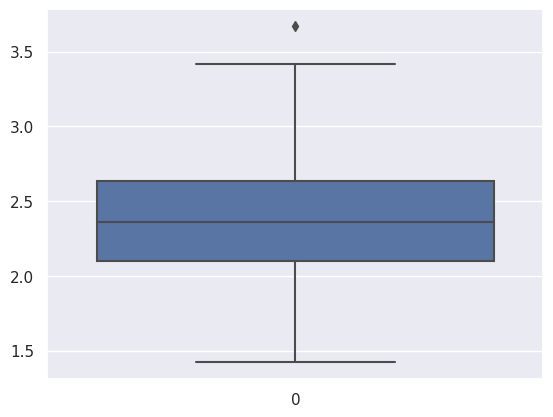

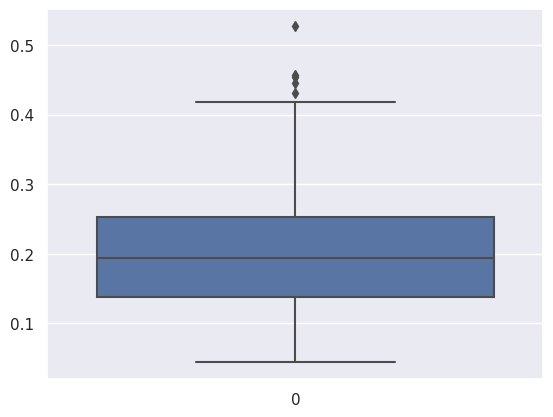

In [13]:
def boxplot(col):
  sns.boxplot(df[col])
  plt.show()

for i in list(df.columns)[1:]:
  boxplot(i)

We can see that we do have some outliers here for some of the features. But as we are dealing with dataset from healthcare we need to be very careful about the outliers as they might be the values for our severe patients. Values are way beyond the normal range, that's why they are outliers. But if we remove such entries from our dataset then we will lose on some critical datapoints to detect this disease. So we are going to leave them as it is.

# Visualization : Correlation Matrix

This is a good visualization to select our top features for our dataset, specially for numerical attributes.
**Multicollinearity** occurs when two or more independent variables have a high correlation with one another in a regression model, which makes it difficult to determine the individual effect of each independent variable on the dependent variable. With help of correlation matrix we can identify to some extent if there is any multicollinearity in our data. In the following heatmap if we see any correlation value greater than 90% then that would mean it has multicollinearity.

<Axes: >

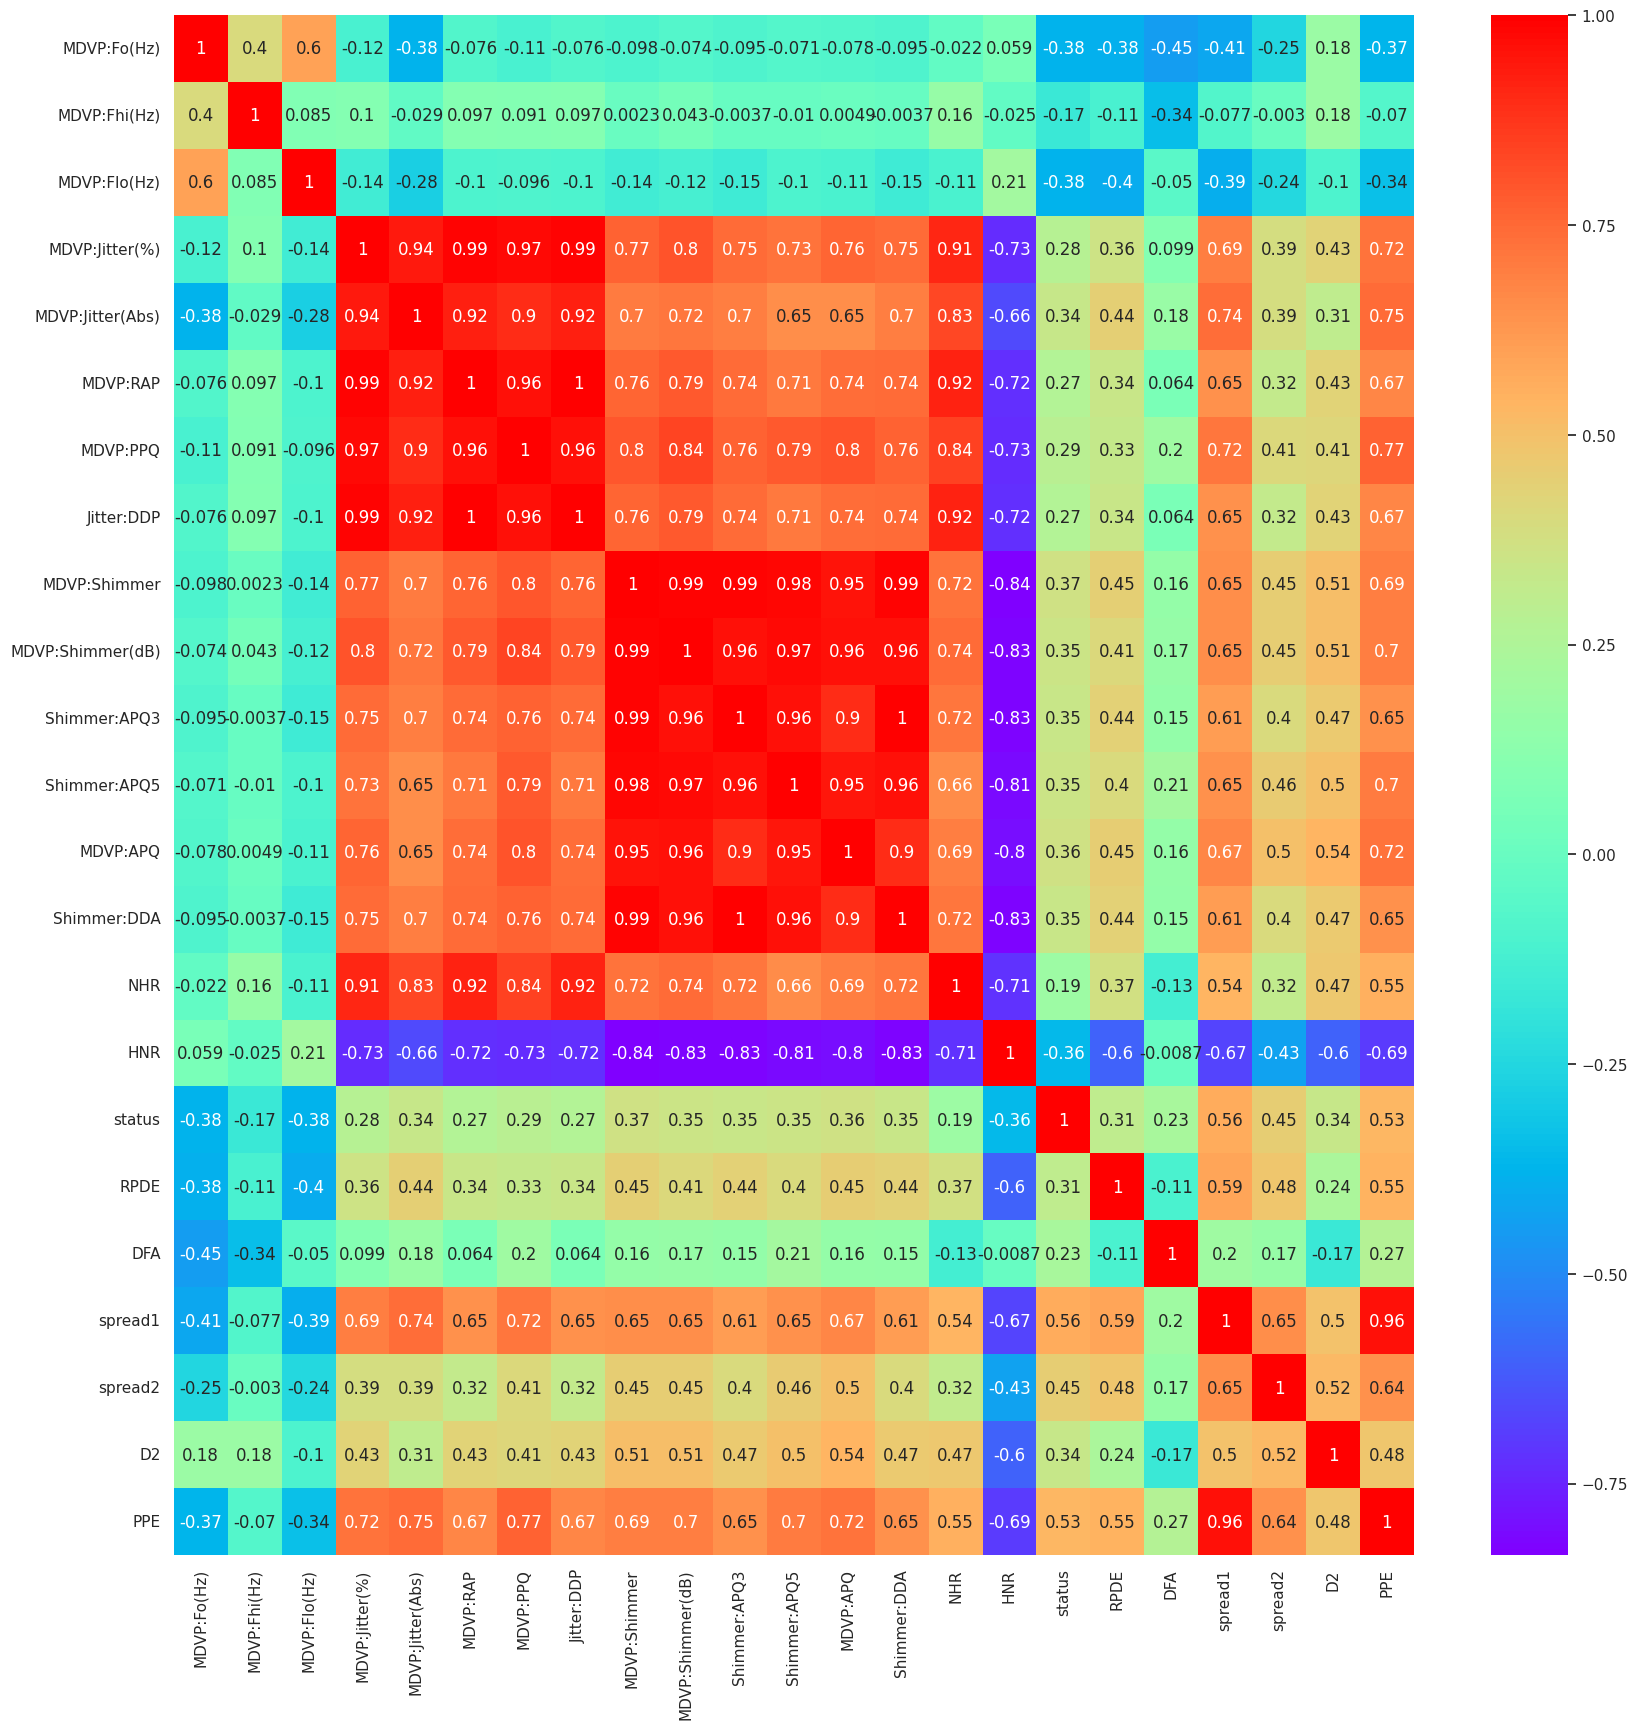

In [14]:
# Find correlation
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

So we can see that we do have some multicollinearity in our dataset.

Later on during our pre-processing we can use PCA to drop such columns and keep only the ones which do not have much correlation between them.

But if you see 'status' column here, none of the feature is impacting it a lot. So we can leave the part of handling multicollinearity here. If it had values greater that 0.7 or so then we would have to drop such features from our dataset. Also we know that, this is a classification problem so we don't have to worry much about it, if it would have been a regression problem then it would have been important.

# Visualization : Pairplot

We can check the features in relation to the status one-by-one to get an idea if there is any relation or not.

In [ ]:
sns.pairplot(df, hue='status')

Output hidden; open in https://colab.research.google.com to view.

# Data pre-processing and EDA:

We are going to remove '**name**' column as there is no use of that. Now for X values we will also drop status and in Y values we will store only status as that is our target column.

In [7]:
x = df.drop(['status', 'name'], axis=1)
y = df['status']

# Data Balancing:

As we can see below the dataset is imbalanced so we should balance the dataset first otherwise accuracy will not be good measure for our models.

In [8]:
y.value_counts()

1    147
0     48
Name: status, dtype: int64

<Axes: ylabel='status'>

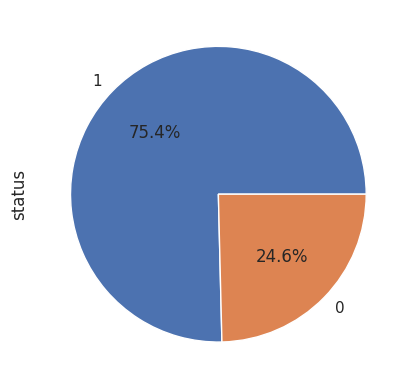

In [9]:
y.value_counts().plot.pie(autopct='%1.1f%%')

So we will be using **Random Over Sampling** which means *the minority class size will be increased in order to match with the majority*. We are using this technique because we do not have lot of datapoints in our dataset. In our case we have majority class size as **147** so the minority class will be increased upto this point (from 48) so that it matches the class size and we have a balanced dataset.

In [10]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(y.value_counts())
print('##################')
print(y_ros.value_counts())

1    147
0     48
Name: status, dtype: int64
##################
1    147
0    147
Name: status, dtype: int64


Now our dataset is completely balanced. We have 147 entries for healthy patients and 147 entries for Parkinson's patients.

# Feature Scaling:

***Feature scaling*** is an important step to take prior to training of machine learning models to ensure that features are within the same scale. For example if feature-1 and feature-2 are at different scales then it might result in one feature dominating over the other feature. SciKit learn offers several tools to perform feature scaling. In order to do that we will be using Normalization technique here. **Normalization** is conducted to make feature values range from 0 and 1.
Now we will be doing feature scaling by normalization technique. If we want to build a deep neural network it is a mandatory step.

In [11]:
# Feature Scaling by Normalization
scalar = MinMaxScaler((-1, 1))
x = scalar.fit_transform(x_ros)
y = y_ros

In [12]:
x.shape


(294, 22)

# Applying PCA (Principal Component Analysis):

Now we need to know if all features are relevant for our model or not. We can do this by applying PCA, Principal Component Analysis. It is mainly used for dimensionality reduction in machine learning. We do not have loads of columns or features in our dataset but this tool is very handy when that is the case.
Dimensionality reduction refers to the techniques that reduce the number of input variables in a dataset. Less dimension means less computation or training time. Also the redundancy is removed after removing similar entries from the dataset.It heps to find out the most significant features and skip the rest which leads to better human interpretations.

In [13]:
#We are taking 95% significance and dropping the rest
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


So we can see that out of 22 features we have 8 significant ones. So we can let go the others.

# Train and Test Split:

Here we will split our dataset in train and test. We will go with 80-20 split for our case. So training data will have 80% of datapoints and the test dataset will have 20%

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1)

# Model Building:

Now when we have our train and test data so we can start modeling. As this is the classification problem so it is natural to start with Logistic Regression.

# **Model 1 : Logistic Regression**

Here in the parameters '**C**' is the inverse of the regularization strength.
'**solver**' is the algorithm to use in the optimization problem. It is liblinear here as the class LogisticRegression is implemented with regularized logistic regression using the ‘liblinear’ library. So **regularization** is applied by default here. And '**max_iter**' is the Maximum number of iterations taken for the solvers to converge.

In [34]:
#Model 1 Logistic Regression
list_met = []
list_accuracy = []

#We are using liblinear solver here and parameters as shown below, others have default values
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(x_train, y_train)
#Prediction
y_pred = classifier.predict(x_test)
#Accuracy
accuracy_LR = accuracy_score(y_test, y_pred)

# **Model 2 : Decision Tree Classifier**

**Decision Trees** (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
**DecisionTreeClassifier** is a class capable of performing multi-class classification on a dataset.
So here the class has a parameter called '**criterion**' that means the function to measure the quality of a split. Default option is **gini**

In [35]:
#Model 2 DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=12082023)
dt = classifier2.fit(x_train, y_train)

#Prediction
y_pred2 = classifier2.predict(x_test)
#Evaluation
accuracy_DT = accuracy_score(y_test, y_pred2)

# **Model 3 : Random Forest Classifier Gini**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size **max_features**.
Here also the class has a parameter called '**criterion**' that means the function to measure the quality of a split. Default option is **gini**

In [36]:
#Model 3
#Criteria is Gini
classifier3 = RandomForestClassifier(random_state=12082023)
rfi = classifier3.fit(x_train, y_train)
#Prediction
y_pred3 = classifier3.predict(x_test)
#Evaluation
accuracy_RFI = accuracy_score(y_test, y_pred3)

# **Model 4 : Random Forest Classifier Entropy**

In machine learning, ensemble models perform better than individual models with high probability. An ensemble model combines different machine learning models into one. The Random Forest is a popular ensemble that takes the average of many Decision Trees via bagging. Bagging is short for “bootstrap aggregation,” meaning that samples are chosen with replacement (bootstrapping), and combined (aggregated) by taking their average.
Here we want to change the **criterion** to **entropy** and see how our model works.

In [37]:
#Model 4
classifier4 = RandomForestClassifier(criterion = 'entropy', random_state=12082023)
rfe = classifier4.fit(x_train, y_train)
#Prediction
y_pred4 = classifier4.predict(x_test)
#Evaluation
accuracy_RFE = accuracy_score(y_test, y_pred4)

# **Model 5 : Support Vector Machine**

Here we will be using **C-Support Vector Classification**.The implementation is based on **libsvm**. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. But our dataset is not huge so we are good. The multiclass support is handled according to a one-vs-one scheme. The default kernel is '**rbf**' here.

In [38]:
#Model 5
model_svm = SVC()
SVM = model_svm.fit(x_train, y_train)

#Prediction
y_pred5 = model_svm.predict(x_test)
#Evaluation
accuracy_SVC = accuracy_score(y_test, y_pred5)

# **Model 6 : K Nearest Neighbours Classifier**

This is the Classifier implementing the **k-nearest neighbors** vote. Number of neighbors to use by default is 5, we will go with that. And by default we will be using uniform weights. By default the algorithm will be **auto** which will attempt to decide the most appropriate algorithm based on the values passed to fit method.

In [39]:
#Model 6
model_knn = KNeighborsClassifier()
knn = model_knn.fit(x_train, y_train)

#Prediction
y_pred6 = model_knn.predict(x_test)
#Evaluation
accuracy_KNN = accuracy_score(y_test, y_pred6)

# **Model 7 : Gaussian Naive Bayes**

Next we will be using Gaussian Naive Bayes with all default parameters.

In [40]:
#Model 7
model_gnb = GaussianNB()
gnb = model_gnb.fit(x_train, y_train)

#Prediction
y_pred7 = gnb.predict(x_test)
#Evaluation
accuracy_GNB = accuracy_score(y_test, y_pred7)

# **Model 8 : Bernoulli Naive Bayes**

Now we will use Bernoulli Naive Bayes with all default parameters.

In [41]:
#Model 8
model_bnb = BernoulliNB()
bnb = model_bnb.fit(x_train, y_train)

#Prediction
y_pred8 = bnb.predict(x_test)
#Evaluation
accuracy_BNB = accuracy_score(y_test, y_pred8)

# **Model 9 : Ensemble by using voting class:**

The word Ensemble in the context of ML refers to a collection of a finite number of ML models trained for the same task. Usually, the models are trained independently and then their predictions are combined. When the predictions from different models differ, it is sometimes more useful to use the ensemble for classification than any individual classifier.

This classifier uses Soft Voting/Majority Rule classifier for unfitted estimators.When voting is '**hard**', it uses predicted class labels for majority rule voting. **flatten_transform** is a boolean parameter here which means It affects shape of transform output only when voting='**soft**' If voting='**soft**' and **flatten_transform**=True, transform method returns matrix with shape (n_samples, n_classifiers * n_classes). If **flatten_transform**=False, it returns (n_classifiers, n_samples, n_classes).



In [42]:
#Combine all models by using voting class

evc = VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RFI', rfi), ('RFE', rfe), ('SVC', SVM), ('KNN', knn), ('GNB', gnb), ('BNB', bnb)], voting='hard', flatten_transform=True)

model_evc = evc.fit(x_train, y_train)

#Prediction
pred_evc = evc.predict(x_test)
#Evaluation
accuracy_EVC = accuracy_score(y_test, pred_evc)

# **Model 10 :XGBoost Classifier:**

Now we will be using XGBoost classifier.

Boosting is a strong alternative to bagging. Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models (usually Decision Trees) went wrong. In Gradient Boosting, individual models train upon the residuals, the difference between the prediction and the actual results. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round.

In [79]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
xgb = model_xgb.fit(x_train, y_train)

y_pred9 = xgb.predict(x_test)

accuracy_XGB = accuracy_score(y_test, y_pred9)

print("Accuracy of XGB Classifier is : ", accuracy_XGB)

print('#####Confusion Matrix for Test Data #######')
print(confusion_matrix(y_test, y_pred9))
print('#####Classification Report for Test Data #######')
print(classification_report(y_test, y_pred9))

Accuracy of XGB Classifier is :  1.0
#####Confusion Matrix for Test Data #######
[[29  0]
 [ 0 30]]
#####Classification Report for Test Data #######
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



# **Models Evaluation : With Visualizations**

For every model above we have alread evaluated the accuracy. Now we will check which model is best.

            Method Used  Accuracy
0   Logistic Regression  0.728814
1         Decision Tree  0.966102
2     RandomForest Gini  1.000000
3  RandomForest Entropy  1.000000
4        Support Vector  0.966102
5                   KNN  0.949153
6            GaussianNB  0.762712
7           BernoulliNB  0.779661
8     Voting Classifier  0.983051
9               XGBoost  1.000000
Axes(0.125,0.11;0.775x0.77)


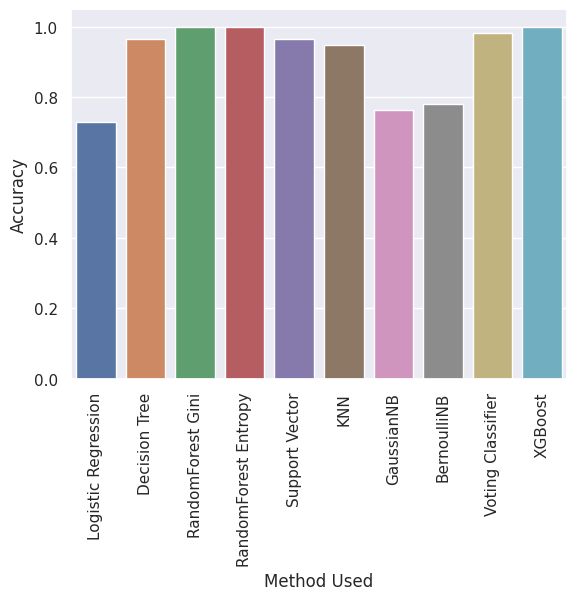

In [80]:
#Make a list of all model names we have used so far
list1 = ["Logistic Regression", "Decision Tree", "RandomForest Gini", "RandomForest Entropy",
         "Support Vector", "KNN", "GaussianNB", "BernoulliNB", "Voting Classifier", "XGBoost"]

#Make a list of all accuracies we calculated for each one of them
list2 = [accuracy_LR, accuracy_DT, accuracy_RFI, accuracy_RFE, accuracy_SVC, accuracy_KNN, accuracy_GNB, accuracy_BNB, accuracy_EVC, accuracy_XGB]

#Make a list of all classifiers we created and used for each one of them
list3 = [classifier, classifier2, classifier3, classifier4, model_svm, model_knn, model_gnb, model_bnb, model_evc, model_xgb]

#This will consolidate all models with their accuracies
df_accuracy = pd.DataFrame({'Method Used' : list1, "Accuracy" : list2})
print(df_accuracy)

#This will draw a bar plot to get a visual interpretation of comparison of all models
charts = sns.barplot(x='Method Used', y='Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

Remember that we are using Accuracy as the metric to compare models now. Looks like Random Forest with Gini is the best one so far. Next is Random Forest with Entropy. Ensemble is doing exactly same as Random forest with entropy. Then comes Decision Trees, Support Vector Machines and kNN.
After that is Logistic Regression. At the end are Naive Bayes Gaussian and Naive Bayes Bernoulli.

Confusion Matrix looks very good. Look at the precision and recall, they are perfect too. F1 score is perfect.

**Classification Report and Confusion Matrix for best models:**

Looks like Random Forest with Entropy was best so far. And also lets inspect kNN as it is a reliable model for clinical data.

In [45]:
#Random Forest with Entropy
y_pred4_train = classifier4.predict(x_train)
y_pred4_test = classifier4.predict(x_test)

#kNN
y_pred_knn_train = model_knn.predict(x_train)
y_pred_knn_test = model_knn.predict(x_test)

**Confusion Matrix for Random Forest with Entropy:**

We will come up with confusion matrix for model 4 which is Random Forest with Entropy. First one is for training data and second one is for test data.

In [75]:
print('#####Confusion Matrix for Training Data #######')
print(confusion_matrix(y_train, y_pred4_train))
print('#####Confusion Matrix for Test Data #######')
print(confusion_matrix(y_test, y_pred4_test))

#####Confusion Matrix for Training Data #######
[[118   0]
 [  0 117]]
#####Confusion Matrix for Test Data #######
[[29  0]
 [ 0 30]]


So here false positive and false negative are both zero, which is very good.

**Confusion Matrix for kNN:**

In [76]:
print('#####Confusion Matrix for Training Data #######')
print(confusion_matrix(y_train, y_pred_knn_train))
print('#####Confusion Matrix for Test Data #######')
print(confusion_matrix(y_test, y_pred_knn_test))

#####Confusion Matrix for Training Data #######
[[117   1]
 [  9 108]]
#####Confusion Matrix for Test Data #######
[[28  1]
 [ 2 28]]


But for kNN the false positive for training is 9 which is more. It is 2 for test data. So definitely not good as compared to Random Forest.

**Classification Report for Random Forest with Entropy:**

In [48]:
print('#####Classification Report for Training Data #######')
print(classification_report(y_train, y_pred4_train))
print('#####Classification Report for Test Data #######')
print(classification_report(y_test, y_pred4_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       117

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

###################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



As we can see, the precision and recall both look perfect here.

**Classification Report for kNN:**

In [49]:
print(classification_report(y_train, y_pred_knn_train))
print('###################################')
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       118
           1       0.99      0.92      0.96       117

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235

###################################
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.97      0.93      0.95        30

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



For kNN the precision and recall is also good but not better than random forest ofcourse.

**Evaluation Metric : AUC and ROC**

Now we can draw the ROC curve and see the AUC score for kNN or Random Forest model.

In [77]:
def plot_roc_curve(model, x_test, y_test):
  probabilities = model.predict_proba(np.array(x_test))
  predictions = probabilities
  fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
  roc_auc = auc(fpr, tpr)
  print(f'The AUC score is {roc_auc}')

  plt.plot([0,1], [0,1], '--')
  plt.plot(fpr, tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()


The AUC score is 0.993103448275862


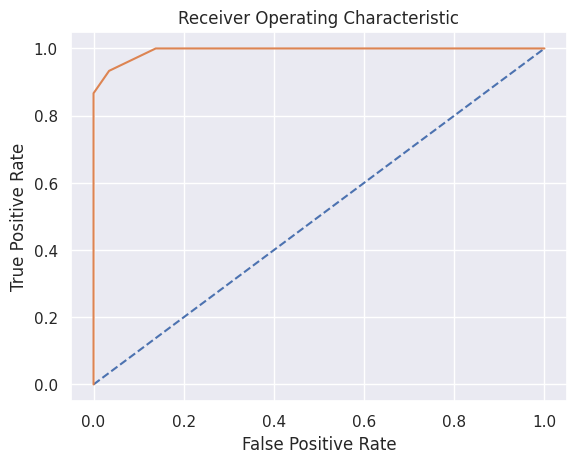

In [78]:
plot_roc_curve(knn, x_test, y_test)

# **Model 9 : Neural Net for Classification**

Now we will using Neural network for classification. Yes! We can use neural nets for classification as well. It always intrigued me how it works so I thought of including this in my project, just to get a perspective.

Deep learning can be used for binary classification, too. In fact, building a neural network that acts as a binary classifier is little different than building one that acts as a regressor.

So here you build a neural network that performs binary classification by including a single neuron with sigmoid activation in the output layer and specifying binary_crossentropy as the loss function. The output from the network is a probability from 0.0 to 1.0 that the input belongs to the positive class.

In [17]:
#Method to plot the loss and accuracy over all the epochs
#Tensorflow keeps a track of the history so we can use them to plot this
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.legend()
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Cross Entropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.legend()
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

Building a neural network that performs binary classification involves making two simple steps:

*   Add an activation function - specifically, the sigmoid activation function - to the output layer. Sigmoid reduces the output to a value from 0.0 to 1.0 representing a probability.
*   Change the loss function to binary_crossentropy, which is purpose-built for binary classifiers. Accordingly, change metrics to 'accuracy' so accuracies computed by the loss function are captured in the history object returned by fit.



In [4]:
#For our neural net model we will be using TensorFlow
#Linear stack of models/layers
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(8,)),#First layer
    tf.keras.layers.Dense(32, activation='relu'),#Second layer
    tf.keras.layers.Dense(1, activation='sigmoid')#Final layer or Output layer that is why it is sigmoid
])

#In tensor flow we have to compile our model before we fit
#Here we are using learning_rate as 0.001
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])



That's all it takes to create a neural network that serves as a binary classifier. You still call fit to train the network, and you use the returned history object to plot the training and validation accuracy to determine whether you trained for a sufficient number of epochs and see how well the network fit to the data.

In [15]:
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

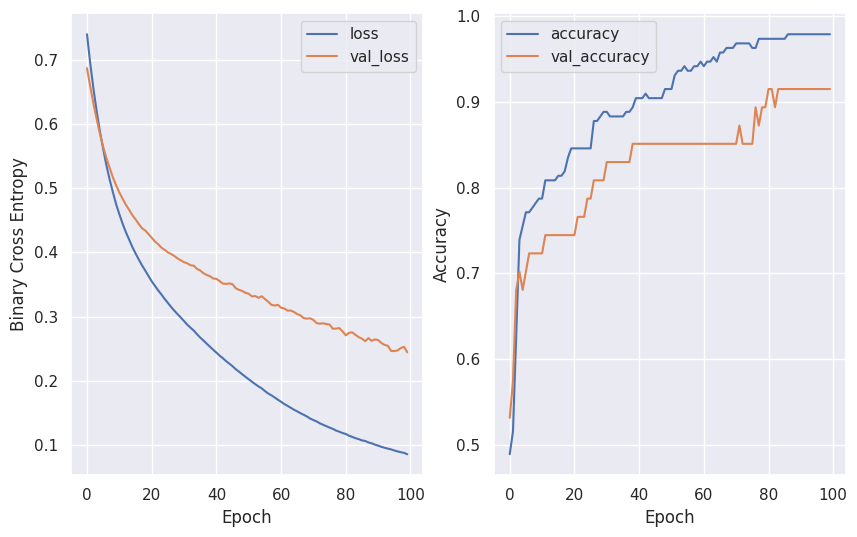

In [18]:
plot_history(history)

We can see that loss is decreasing steadily. Also we can see that the validation accuracy is improving from 0.55 to 0.93 approximately.

**Hyperparameter Tuning:**

Now we can do some hyperparameter tuning, just to find the model with minimum loss and maximum accuracy. We can change number of nodes, learning rate, batch size and number of epochs and so on. We can do sort of grid search to find the best set of parameters for our model.

Here if you notice we have added **drop out layers**, it randomly sets input units to 0 with a frequency of rate at each step during training time, which ***helps prevent overfitting***.

In [19]:
def train_nn_model(x_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, num_epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(8,)),
      tf.keras.layers.Dropout(dropout_prob),#Drop out layer
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),#Drop out layer
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history

In [20]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for learning_rate in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'num_nodes: {num_nodes}, dropout_prob: {dropout_prob}, learning_rate: {learning_rate}, batch_size: {batch_size}')
        model, history = train_nn_model(x_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
        plot_history(history)
        val_loss, val_acc = model.evaluate(x_test, y_test)
        print(f'val_loss: {val_loss}, val_acc: {val_acc}')
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


Output hidden; open in https://colab.research.google.com to view.

As we can see above, the loss was very low, like 0.1342 and the accuracy went up like 0.9661

# Classificationiction by Neural Net:

Now we will take our least loss model and predict the class of test data.

In [21]:
y_pred = least_loss_model.predict(x_test)
#Here we are using threshold as 0.5 so anything above that will be a 1 otherwise 0
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print('#####Confusion Matrix for Test Data #######')
print(confusion_matrix(y_test, y_pred))
print('#####Classification Report for Test Data #######')
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
#####Confusion Matrix for Test Data #######
[[29  0]
 [ 0 30]]
#####Classification Report for Test Data #######
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



So accuracy is 100% and F1 score is awesome too. So we got a model is performing almost like Random Forest in our case. In this case it doesn't matter which model we use but when we have huge bunch of data then neural nets will be a good choice!

# **Conclusion:**

As we were using very sensitive clinical data we did not remove the outliers and in fact let them stay in our dataset. Those could be important drivers for our model. As this was the classification problem we used several models to see which ones were good for our use case. As far as accuracy was concerned we saw that Random Forest was best model. Also XGBoost was great. kNN could not do very well as it seems to be a lazy algorithm. The classification report for kNN also showed that we had some false negatives and false positives in test data. So for data which our model has not seen, it did not do so good there. It could say a person has Parkinson's disease when s/he had just a symptom because of some other reason. It could miss identifying an actual patient to be healthy and that is also detrimental. So in such cases, accuracy can't be the only criteria. F1 score is important. If a model says, a patient has Parkinson's disease then it should be true and vice versa.

One point to be noted in this project is, When we used neural nets for classification we could use **hyperparameter tuning** to get the best parameters for our least loss model. So I would say that **Neural Nets** was the best choice so far.